<a href="https://colab.research.google.com/github/Sameep1234/ML_Algorithms_From_Scratch/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
* Linear Regression can't work in case of classficiation.
* The reason is that linear regression will output any continuous real values whereas for classification, we require outputs that are discrete.
* This is why there is an element of probability involved.
* Logistic Regression models the probability of a data point being in each of the category and based on a threshold, assigns them to one fo the classes.
* Also note that, logistic regression is a discriminative model implying that the algorithm learns about the separability or decision boundary of the classes instead of learning about distributions of each individual classes which is the case for generative models.

# Working
* Logistic Regression uses something called as logistic function.
* Why is there a need for it?
  * Linear regression can't model probability because for some values of X, linear regression will always output a value either less than 0 or greater than 1.
  * This does not make sense because the values of probability should always be between 0 and 1.
  * 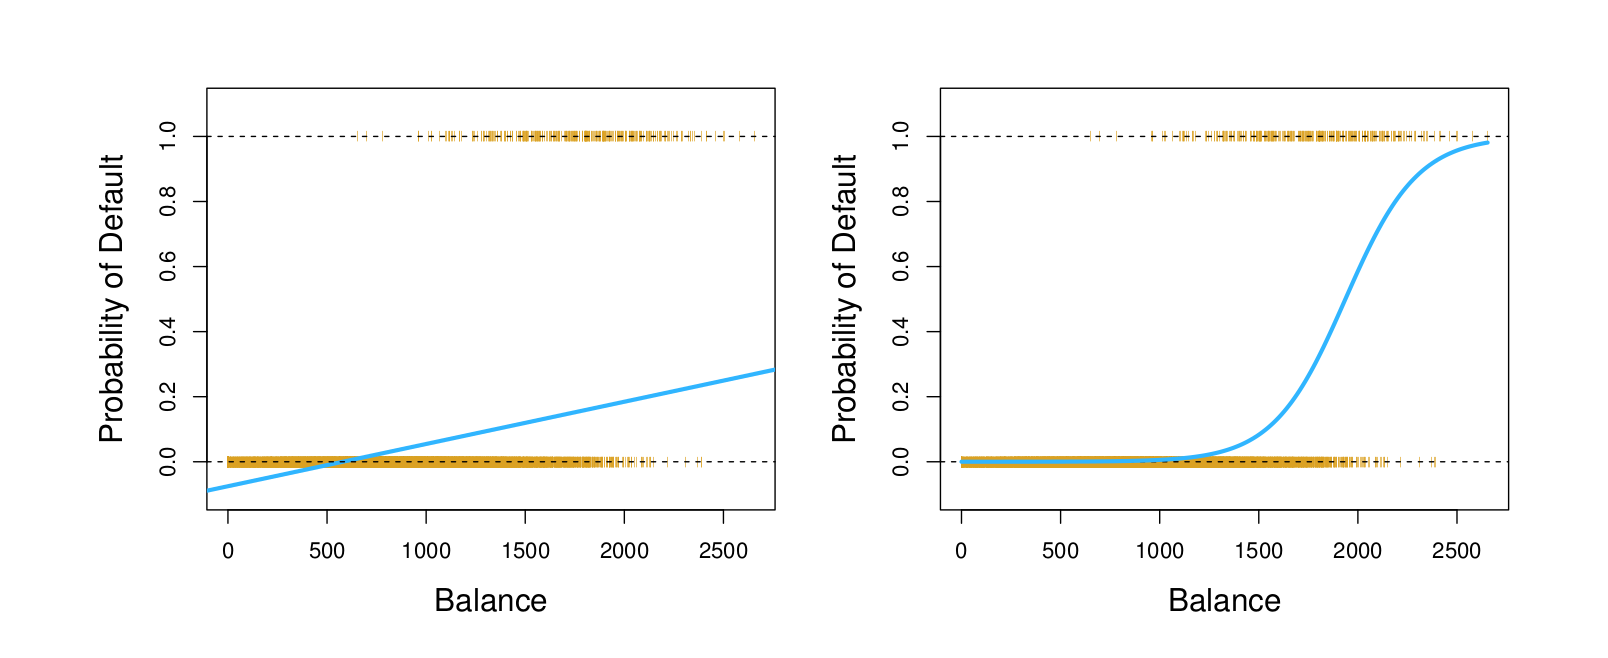
  * As can be seen in the above figure, there is a need for non-linear S-Shaped curve (Logistic function).
* Most commonly used logistic function is the sigmoid function whose formula is 1/1 + e^(-$\Theta$^T*x) where x is the input features and theta are the weights or parameters and we take transpose of it.
* Speciality of this logistic function (sigmoid) is that the range of values is always between 0 and 1 which is ideal for modelling probabilities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset
!wget https://raw.github.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

--2022-05-05 04:27:47--  https://raw.github.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt [following]
--2022-05-05 04:27:47--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘marks.txt.1’

marks.txt.1         100%[================

In [3]:
# Load the dataset

marks_df = pd.read_csv("/content/marks.txt", names=['Midsem', 'Endsem', 'Admission'])
marks_df.head()

,Midsem,Endsem,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### About the dataset
* The dataset about is simple dataset containing two features which are the marks scored by a particular student in mid semester exam and end semester exam.
* Based on those, it is decided whether the student is admitted to a particular university of not.
  * 1 --> Admitted and 0 --> Not Admitted
* This is thus a binary classification problem.

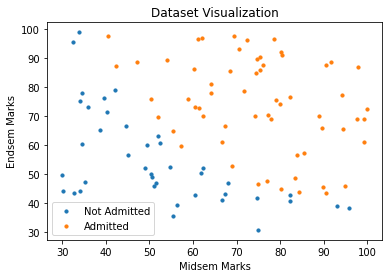

In [4]:
# Plot the dataset for better visualization

plt.scatter(x=marks_df[marks_df['Admission'] == 0]["Midsem"], y=marks_df[marks_df['Admission'] == 0]['Endsem'], s=10, label='Not Admitted')
plt.scatter(x=marks_df[marks_df['Admission'] == 1]['Midsem'], y=marks_df[marks_df['Admission'] == 1]['Endsem'], s=10, label='Admitted')
plt.xlabel("Midsem Marks")
plt.ylabel("Endsem Marks")
plt.title("Dataset Visualization")
plt.legend(loc='best')
plt.show()

# Cost Function
